* https://towardsdatascience.com/building-a-one-shot-learning-network-with-pytorch-d1c3a5fafa4a

In [1]:
from os import walk
import os

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn

from utils import OmniglotDataset, save_checkpoint, load_checkpoint
from model import Net
from train import train

%matplotlib inline

In [2]:
# setting the root directories and categories of the images
root_dir = './images_background_small1/'
categories = [[folder, os.listdir(root_dir + folder)] for folder in os.listdir(root_dir)  if not folder.startswith('.') ]

In [3]:
# choose a training dataset size and further divide it into train and validation set 80:20
n_samples = 20

t = transforms.Compose([transforms.ToTensor()]) 
omniglotDataset = OmniglotDataset(categories, root_dir, setSize=n_samples, transform=t)

# split into train/val
train_size = int(n_samples * 0.8)
val_size = n_samples - train_size
train_set, val_set = random_split(omniglotDataset, [train_size, val_size])

# construct dataloader
train_loader = DataLoader(train_set, batch_size=4, num_workers=0)
val_loader = DataLoader(val_set, batch_size=1, num_workers=0, shuffle=True)

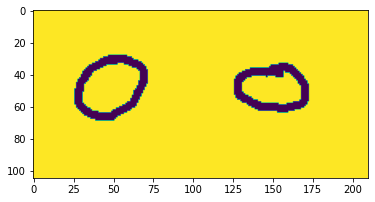

In [4]:
# showing an example of a "similar" pair:
for img1, img2, label in train_loader:
    if label[0] == 1:
        plt.imshow(np.hstack([img1[0][0], img2[0][0]]))
        break

# Part 2: Training

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

siameseBaseLine = Net()
siameseBaseLine = siameseBaseLine.to(device)

In [6]:
optimizer = optim.Adam(siameseBaseLine.parameters(), lr = 0.0006)
num_epochs = 5
criterion = nn.BCEWithLogitsLoss()
save_path = 'siameseNet-batchnorm50.pt'
train(
    model=siameseBaseLine,
    optimizer=optimizer,
    train_loader=train_loader, 
    val_loader=val_loader,
    num_epochs=num_epochs, 
    criterion=criterion, 
    out_path=save_path,
    device=device
)

Starting epoch 1
Validation loss: 0.7026301622390747
Starting epoch 2
Validation loss: 0.6042484864592552
Starting epoch 3
Validation loss: 0.8134566247463226
Starting epoch 4
Validation loss: 1.1950969323515892
Starting epoch 5
Validation loss: 0.586386427283287
Model saved to ==> siameseNet-batchnorm50.pt
Finished Training
